<a href="https://colab.research.google.com/github/Aswin-Balaji-R/Maternal-Health-Risk-Data/blob/main/Aswin_Balaji_Proj_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split as split, GridSearchCV

#Data set Uploading

In [5]:
dt=pd.read_csv('/content/Maternal Health Risk Data Set.csv')

In [7]:
#To display the first few rows of a dataframe.
dt.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [8]:
#To display last few rows of a dataframe.
dt.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [10]:
#To dislplay summary of dataframe that includes,columns ,datatypes,non-null count and memory usage for each column
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [11]:
#To retrive the dimensions of the dataframe.
dt.shape

(1014, 7)

In [12]:
#To check null/Missing values
dt.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [13]:
#To check if we have Duplicate values present in our dataset
dt.duplicated().sum()

562

In [14]:
#To provide staistical summary of dataframe such as count ,mean,min,max and more
dt.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [15]:
#To count the number of distinct values present in each column
unique_value_counts = dt.nunique()

In [16]:
unique_value_counts

,0
Age,50
SystolicBP,19
DiastolicBP,16
BS,29
BodyTemp,8
HeartRate,16
RiskLevel,3


#Plotting

<ipython-input-20-4ed0d89774da>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="RiskLevel", data=data,order=risk_order, palette=colors)


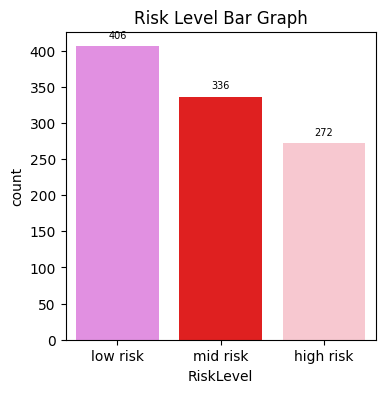

In [20]:
#defineing custom colors for bar chart bars
colors = ['violet', 'red', 'pink']
#order in which risk level should be displayed
risk_order = ["low risk", "mid risk", "high risk"]
#creating fig with specific size
plt.figure(figsize=(4, 4))
#setting title
plt.title('Risk Level Bar Graph')
#creating bar plot for risklevel column from dataset with the colors you want
count = sns.countplot(x="RiskLevel", data=data,order=risk_order, palette=colors)
#creating lables for each bar with height of bar
for bar in count.patches:
    count.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=7, xytext=(0, 8), textcoords='offset points')
#show the bar chart
plt.show()

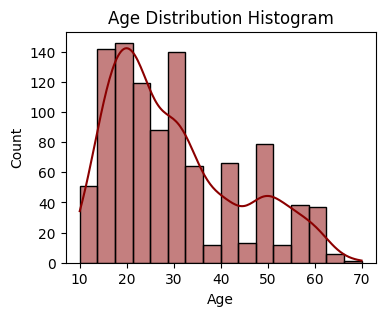

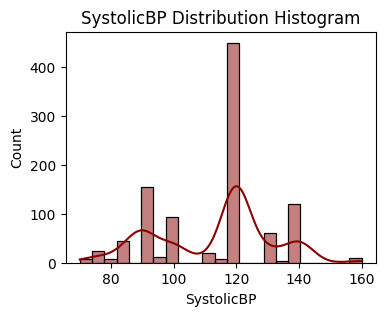

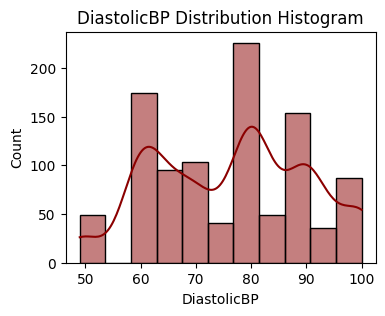

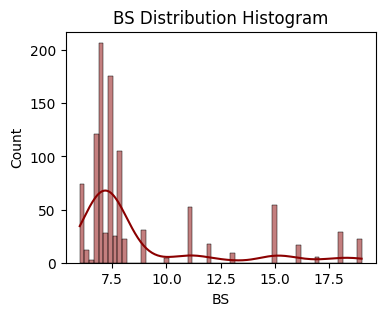

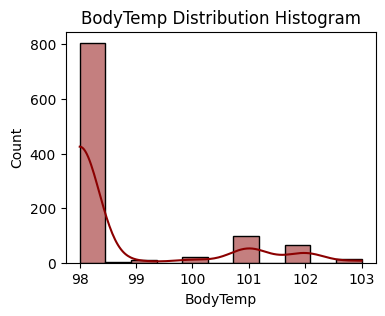

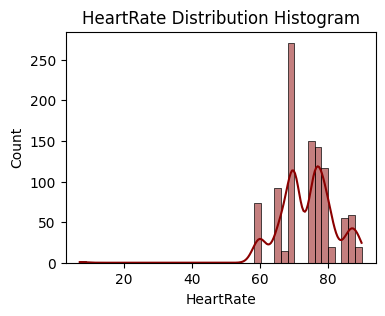

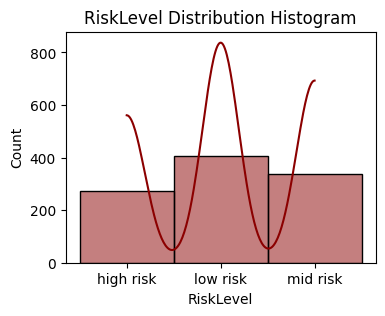

In [22]:

#Histogram for numerical features

#iterate through each coloumn in dataset
for column in dt.columns:
    #create new figure for each column
    plt.figure(figsize=(4,3))
    #create histogram plot
    sns.histplot(data=data[column], kde=True, color='darkred')
    #setting the title
    plt.title(f'{column} Distribution Histogram')
    #set x-axis label to column name
    plt.xlabel(column)
    #display the histogram
    plt.show()


#Handling outliers

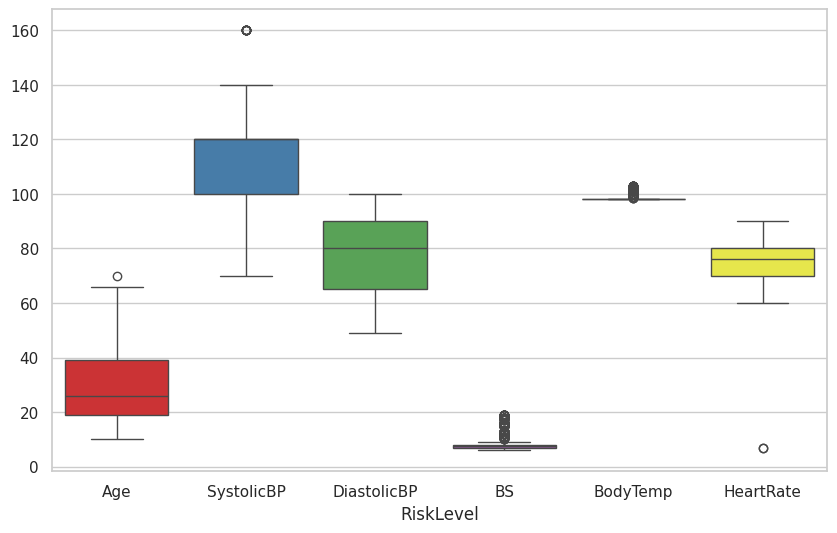

In [23]:
#setting figsize
plt.figure(figsize=(10, 6))
#set style of plot
sns.set(style="whitegrid")
#create box plot for entire dataset with color
sns.boxplot(data=data, palette="Set1")  # Use your dataset and color palette
#set x-axis name
plt.xlabel(column)
plt.show()

<ipython-input-24-c135ff42d732>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['BS'], palette="Set1")
<ipython-input-24-c135ff42d732>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['BodyTemp'], palette="Set1")


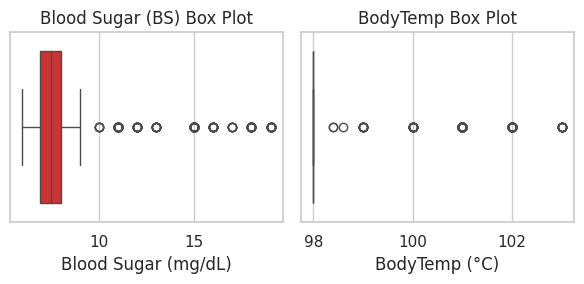

In [24]:
#Creating box plots for BS and BodyTemp
#create fig with size
plt.figure(figsize=(6, 3))
#set style of plot
sns.set(style="whitegrid")
#create sublpot
plt.subplot(121)
#create box plot for BS
sns.boxplot(x=data['BS'], palette="Set1")
plt.title("Blood Sugar (BS) Box Plot")
plt.xlabel("Blood Sugar (mg/dL)")
#create box plot for BodyTemp
plt.subplot(122)
sns.boxplot(x=data['BodyTemp'], palette="Set1")
plt.title("BodyTemp Box Plot")
plt.xlabel("BodyTemp (°C)")
#adjust layout of plots
plt.tight_layout()
plt.show()


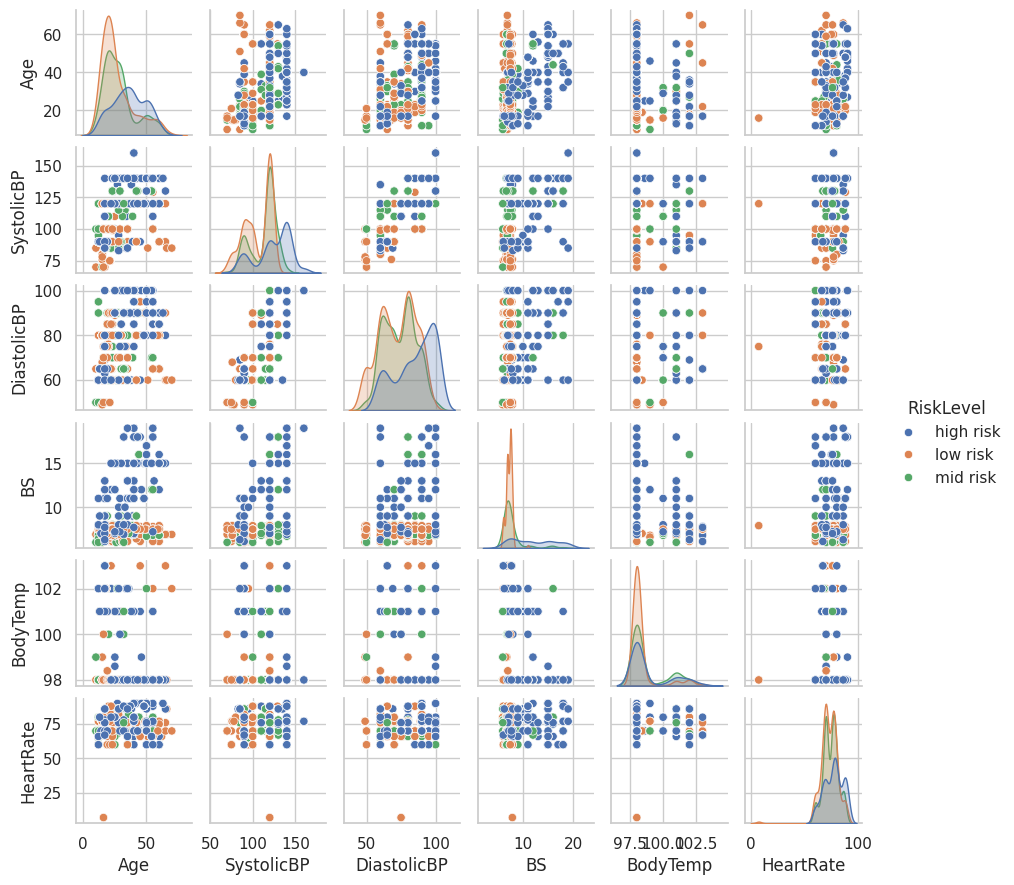

In [25]:
#Pairplot visualization with risklevel as hue
sns.pairplot(data,height=1.5 ,hue='RiskLevel')

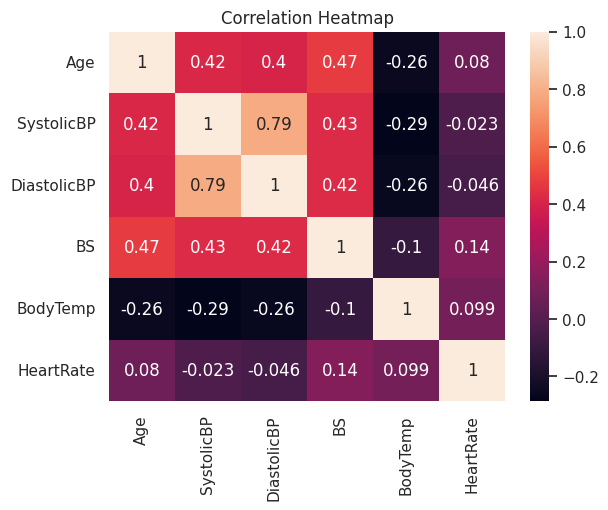

In [26]:
#To determine correlation between features
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

All the dataset is complete and does not have missing values

Heatmap correlation insights:

Age - Risk Level: -55% Age - Heart Rate: -73% Systolic BP - Body Temp: -92% Systolic BP - Diastolic BP: 66% Diastolic BP - Risk Level: 79% Diastolic BP - BS: 58%

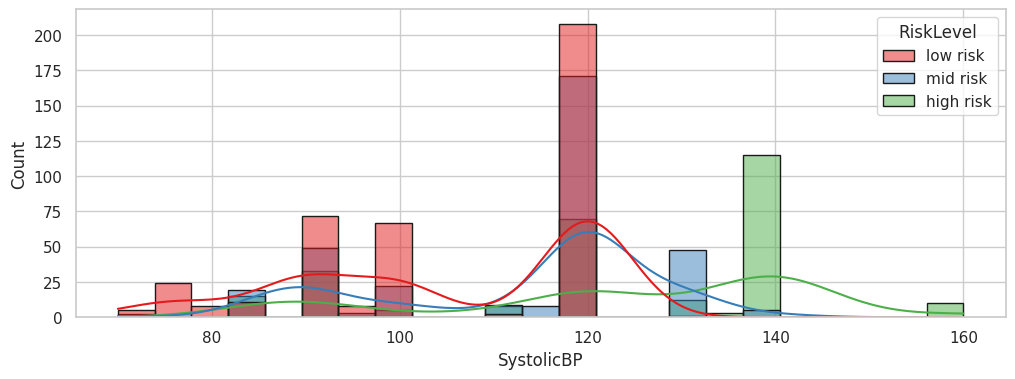

In [27]:

# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()

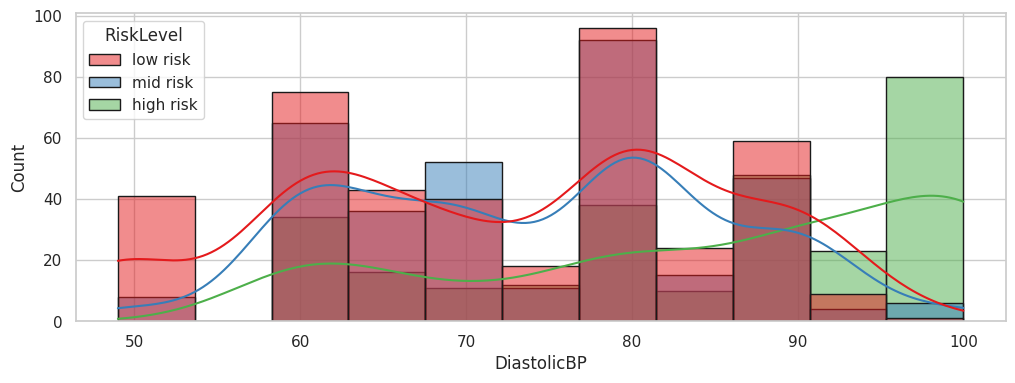

In [28]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()

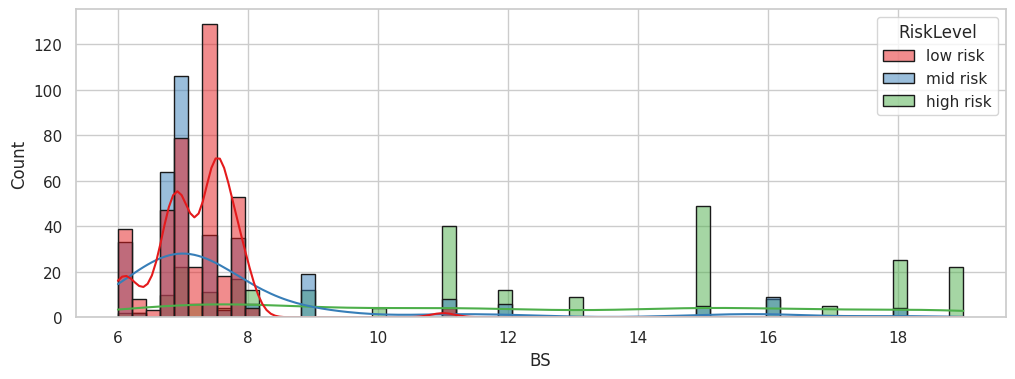

In [29]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()

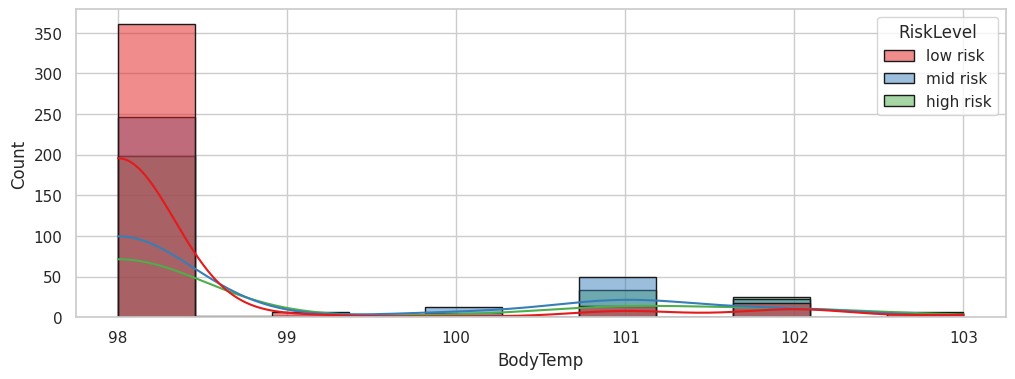

In [30]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()

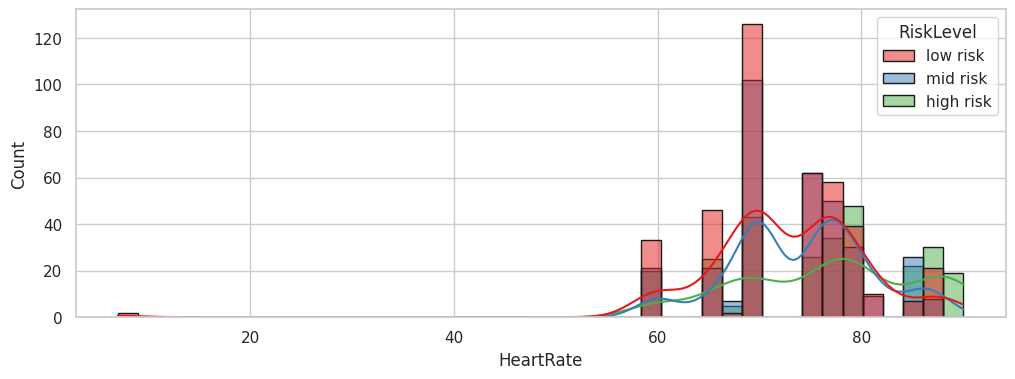

In [31]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()

#Data Preprocessing

In [32]:
#To convert categorical data, which consists of text or string values, into numerical values.
from sklearn.preprocessing import LabelEncoder

In [33]:
# Create a LabelEncoder
label_encoder = LabelEncoder()

In [34]:
# Fit and transform the 'RiskLevel' column in-place
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])

In [36]:
#Removing rows where HeartRate == 7
proc = data.drop(data.index[data.HeartRate == 7])

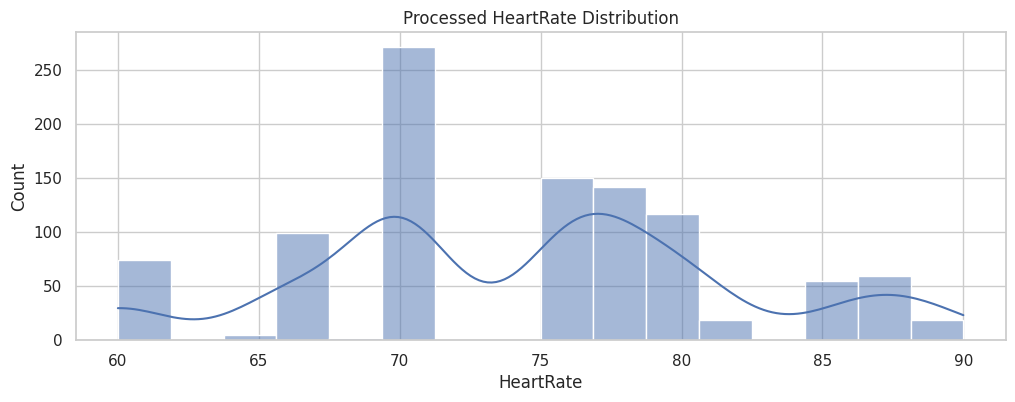

In [37]:
plt.figure(figsize=(12, 4))
#plotting histogram for processed HeartRate
sns.histplot(data=proc, x="HeartRate", kde=True)
plt.title("Processed HeartRate Distribution")
plt.show()

In [38]:
#droppping the HeartRate column
data=data.drop(["HeartRate"],axis=1)

##Splitting of data set

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
#splitting data set into X and y
X = data.drop('RiskLevel',axis=1)
y = data['RiskLevel']

In [42]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp
0,25,130,80,15.0,98.0
1,35,140,90,13.0,98.0
2,29,90,70,8.0,100.0
3,30,140,85,7.0,98.0
4,35,120,60,6.1,98.0
...,...,...,...,...,...
1009,22,120,60,15.0,98.0
1010,55,120,90,18.0,98.0
1011,35,85,60,19.0,98.0
1012,43,120,90,18.0,98.0


In [43]:
y

,RiskLevel
0,0
1,0
2,0
3,0
4,1
5,0
6,2
7,0
8,2
9,0


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#Finding Scores

In [51]:
#importing packages required for SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
#create SVM classifier with parameters
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
#train svm classifier
svm.fit(X_train, y_train)
#calculate and print accuracy of testing and training data
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))
#make predictions on test data
y_pred = svm.predict(X_test)
print(y_pred)

train accuracy: 0.840620592383639
test accuracy: 0.7278688524590164
[2 0 0 1 2 2 2 2 2 0 0 1 1 0 2 2 0 1 1 2 2 2 2 0 1 2 0 2 1 1 2 0 1 1 1 0 0
 2 1 0 2 2 0 0 1 2 0 2 1 1 1 1 1 2 2 2 0 1 1 1 1 2 2 2 2 0 2 0 2 2 0 0 1 2
 1 0 1 2 0 1 1 1 1 1 2 1 1 2 0 2 2 0 1 0 2 1 1 1 0 2 1 0 1 1 1 2 1 1 1 2 2
 2 1 0 2 1 1 0 1 0 2 1 1 2 0 0 2 1 2 1 1 1 2 2 1 1 0 2 1 2 0 2 0 0 1 1 0 2
 1 2 1 1 2 2 0 2 1 2 1 1 1 1 1 1 1 2 2 2 1 1 0 1 2 2 1 0 2 1 1 1 0 2 1 1 0
 1 0 1 1 2 2 1 2 2 1 0 2 0 1 1 2 2 0 0 2 1 2 0 2 2 0 2 1 1 1 0 2 0 1 1 0 0
 2 2 1 2 2 1 0 1 1 1 2 1 2 2 1 1 2 0 0 1 1 1 2 0 1 1 1 1 0 1 2 1 0 1 1 0 0
 1 1 2 1 1 2 0 2 1 0 2 1 0 1 2 0 1 1 1 1 1 1 0 1 0 2 1 0 1 2 2 1 2 1 1 1 0
 0 1 2 1 0 0 2 0 1]


In [61]:
#create cm to evaluate models performance
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
#generate classification report for testdata
from sklearn.metrics import classification_report
print(classification_report(y_test, svm.predict(X_test)))



CM: [[61  6  9]
 [ 4 92 21]
 [ 8 35 69]]
Accuracy: 72.79%
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        76
           1       0.69      0.79      0.74       117
           2       0.70      0.62      0.65       112

    accuracy                           0.73       305
   macro avg       0.74      0.74      0.74       305
weighted avg       0.73      0.73      0.73       305



#Saving the model

In [63]:
import pickle

In [65]:
tfp = "MATERNAL HEALTH RISK DATA.sav"
pickle.dump(dt, open(tfp,'wb'))

#summary

Loading the Data:

Import Libraries: Import the necessary libraries (pandas for data manipulation).

Load Data: Read the dataset from a CSV file into a DataFrame.




Inspecting the Data:

View Initial Data: Display the first few rows to get a sense of the data.

Data Summary: Check the data types and non-null counts for each column.

Checking for Missing Values:

Missing Values Count: Identify and count missing values in each column.

Understanding the Distribution of Key Variables:

Distributions: Analyze the distributions of key variables like age and Heart Rate and etc...

Categorical Counts: Count occurrences of each category in categorical variables like risk levels.

Correlation Analysis:

Correlation Matrix: Compute and display the correlation between numerical variables to understand relationships.

Visualizations:

Histogram: Visualize the distribution of age.

Boxplot: Show BMI distribution by risk level to compare across categories.

Heatmap: Display the correlation matrix visually for better insights.

Statistics for Risk Levels:

Group Statistics: Provide descriptive statistics for different risk levels to compare features.


This summary provides an overview of the steps taken to analyze a maternal health risk dataset, from loading and inspecting the data to performing visualizations and advanced predictive analysis. Adjust the code and analysis according to the specifics of the dataset and objectives